In [54]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
NUM_CLUSTERS = 3
NUM_INPUTS = 4
MAX_ITERATIONS = 100

In [56]:
iris_input = np.genfromtxt('iris.data.txt', delimiter='\t', skip_header=1, dtype=None, usecols=(0, 1, 2, 3))
iris_output = np.genfromtxt('iris.data.txt', delimiter='\t', skip_header=1, dtype=str, usecols=(4,))
INPUT_LEN = len(iris_input)

In [57]:
bounds = np.vstack((np.max(iris_input, axis=0), 
                    np.min(iris_input, axis=0))).T
centers = tf.Variable(np.array([np.array([np.random.uniform(b[1], b[0]) for b in bounds]) for i in range(NUM_CLUSTERS)]), name='centers')
prev = tf.Variable(tf.zeros(centers.get_shape(), dtype=tf.float64), name='prev')

In [58]:
x = tf.expand_dims(iris_input, dim=0, name='x')
y = tf.expand_dims(centers, dim=1)
d = tf.sqrt(tf.reduce_sum(tf.squared_difference(x, y), 2))
cluster = tf.cast(tf.argmin(d, 0), tf.int32, name='cluster')

In [59]:
# is there any progress in training compared to previous iteration?
cont = tf.reduce_any(tf.not_equal(tf.constant(0, dtype=tf.float64), tf.squared_difference(centers, prev)), name='continue')

In [60]:
store = tf.assign(prev, centers, name='store')
update = tf.assign(centers, tf.concat(0, [tf.reduce_mean(tf.gather(iris_input, tf.reshape(tf.where(tf.equal(cluster, i)),[1,-1])), reduction_indices=[1]) for i in range(NUM_CLUSTERS)]), name='update')

In [61]:
sp, idx, count = tf.unique_with_counts(iris_output)

In [62]:
init = tf.initialize_all_variables()
with tf.Session() as session:
    session.run(init)
    n = 0
    while session.run(cont) and n < MAX_ITERATIONS:
        session.run(store)
        session.run(update)
        n += 1

    c = session.run(centers)
    print('Cluster centers:')
    print(c)
    cl = session.run(cluster)
    print("\nIdentified data rows (cluster ids don't match):")
    print(cl)
    
    print('\nOriginal dataset:')    
    print(session.run(sp))
    print(session.run(idx))

Cluster centers:
[[ 6.31458333  2.89583333  4.97395833  1.703125  ]
 [ 5.19375     3.63125     1.475       0.271875  ]
 [ 4.73181818  2.92727273  1.77272727  0.35      ]]

Identified data rows (cluster ids don't match):
[1 2 2 2 1 1 2 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 2 2 1 1 1 2 1 1
 1 2 1 1 2 2 1 1 2 1 2 1 1 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]

Original dataset:
[b'I_setosa' b'I_versicolor' b'I_virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


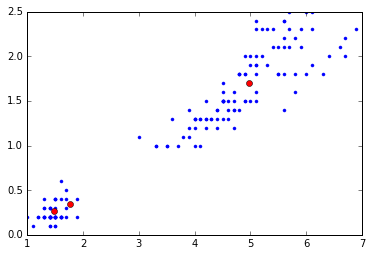

In [63]:
plt.plot(iris_input[:,2], iris_input[:,3], ".")
plt.plot(c[:,2], c[:,3], "o", color='red')